In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

In [2]:
nba = %pip install nba_api


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from nba_api.stats.endpoints import leaguegamefinder

In [ ]:
nba = leaguegamefinder.LeagueGameFinder(date_from_nullable='10/10/2022')
games = nba.get_data_frames()[0]
games

In [5]:
games = games[['GAME_DATE','TEAM_NAME','WL','PTS']]
games

,GAME_DATE,TEAM_NAME,WL,PTS
0,2023-03-18,Santa Cruz Warriors,W,132
1,2023-03-18,Motor City Cruise,W,122
2,2023-03-18,Grand Rapids Gold,W,102
3,2023-03-18,Greensboro Swarm,W,127
4,2023-03-18,Sacramento Kings,W,132
...,...,...,...,...
4401,2022-10-10,Washington Wizards,W,116
4402,2022-10-10,Houston Rockets,L,110
4403,2022-10-10,Denver Nuggets,W,107
4404,2022-10-10,Cleveland Cavaliers,L,97


In [7]:
win = games[games['WL'].str.contains('W')]
lose = games[games['WL'].str.contains('L')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
alt = games[games['TEAM_NAME']=='Atlanta Hawks']['WL'].value_counts()
bos = games[games['TEAM_NAME']=='Boston Celtics']['WL'].value_counts()
chi = games[games['TEAM_NAME']=='Chicago Bulls']['WL'].value_counts()
nop = games[games['TEAM_NAME']=='New Orleans Pelicans']['WL'].value_counts()
dal = games[games['TEAM_NAME']=='Dallas Mavericks']['WL'].value_counts()
hou = games[games['TEAM_NAME']=='Houston Rockets']['WL'].value_counts()
den = games[games['TEAM_NAME']=='Denver Nuggets']['WL'].value_counts()
lac = games[games['TEAM_NAME']=='LA Clippers']['WL'].value_counts()
lal = games[games['TEAM_NAME']=='Los Angeles Lakers']['WL'].value_counts()
mia = games[games['TEAM_NAME']=='Miami Heat']['WL'].value_counts()
mil = games[games['TEAM_NAME']=='Milwaukee Bucks']['WL'].value_counts()
minn = games[games['TEAM_NAME']=='Minnesota Timberwolves']['WL'].value_counts()
bkn = games[games['TEAM_NAME']=='Brooklyn Nets']['WL'].value_counts()
nyk = games[games['TEAM_NAME']=='New York Knicks']['WL'].value_counts()
ind = games[games['TEAM_NAME']=='Indiana Pacers']['WL'].value_counts()
phi = games[games['TEAM_NAME']=='Philadelphia 76ers']['WL'].value_counts()
por = games[games['TEAM_NAME']=='Portland Trail Blazers']['WL'].value_counts()
phx = games[games['TEAM_NAME']=='Phoenix Suns']['WL'].value_counts()
orl = games[games['TEAM_NAME']=='Orlando Magic']['WL'].value_counts()
sas = games[games['TEAM_NAME']=='San Antonio Spurs']['WL'].value_counts()
sto = games[games['TEAM_NAME']=='Stockton Kings']['WL'].value_counts()
okl = games[games['TEAM_NAME']=='Oklahoma City Thunder']['WL'].value_counts()
tor = games[games['TEAM_NAME']=='Toronto Raptors']['WL'].value_counts()
uta = games[games['TEAM_NAME']=='Utah Jazz']['WL'].value_counts()
mem = games[games['TEAM_NAME']=='Memphis Grizzlies']['WL'].value_counts()
was = games[games['TEAM_NAME']=='Washington Wizards']['WL'].value_counts()
det = games[games['TEAM_NAME']=='Detroit Pistons']['WL'].value_counts()
cha = games[games['TEAM_NAME']=='Charlotte Hornets']['WL'].value_counts()
cle = games[games['TEAM_NAME']=='Cleveland Cavaliers']['WL'].value_counts()
gsw = games[games['TEAM_NAME']=='Golden State Warriors']['WL'].value_counts()
games1 = pd.DataFrame([alt,bos,chi,nop,dal,hou,den,lac,lal,mia,mil,minn,bkn,nyk,ind,phi,phx,por,orl,sas,sto,okl,tor
                  ,uta,mem,was,det,cha,cle,gsw])

In [12]:
games1.index = ['Atlanta Hawks','Boston Celtics','Chicago Bulls','New Orleans Pelicans','Dallas Mavericks',
              'Houston Rockets','Denver Nuggets','LA Clippers','Los Angeles Lakers','Miami Heat','Milwaukee Bucks',
              'Minnesota Timberwolves','Brooklyn Nets','New York Knicks','Indiana Pacers','Philadelphia 76ers',
              'Portland Trail Blazers','Phoenix Suns','Orlando Magic','San Antonio Spurs','Stockton Kings',
              'Oklahoma City Thunder','Toronto Raptors','Utah Jazz','Memphis Grizzlies','Washington Wizards',
              'Detroit Pristons','Charlotte Hornets','Cleveland Cavaliers','Golden State Warriors']

In [13]:
print(games1)

                         L   W
Atlanta Hawks           34  32
Boston Celtics          21  45
Chicago Bulls           36  30
New Orleans Pelicans    34  32
Dallas Mavericks        32  34
Houston Rockets         50  16
Denver Nuggets          19  48
LA Clippers             34  34
Los Angeles Lakers      36  31
Miami Heat              31  36
Milwaukee Bucks         20  46
Minnesota Timberwolves  33  35
Brooklyn Nets           28  38
New York Knicks         28  40
Indiana Pacers          37  30
Philadelphia 76ers      22  43
Portland Trail Blazers  31  36
Phoenix Suns            35  30
Orlando Magic           38  29
San Antonio Spurs       50  17
Stockton Kings          15  27
Oklahoma City Thunder   34  32
Toronto Raptors         33  33
Utah Jazz               36  31
Memphis Grizzlies       26  39
Washington Wizards      35  31
Detroit Pristons        51  15
Charlotte Hornets       48  20
Cleveland Cavaliers     28  41
Golden State Warriors   32  35


In [14]:
plt_win_lose = pd.DataFrame(games1)
plt_win_lose.plot.bar(figsize=(15,7), title='Histogram of all teams in 2023 season', ylabel='Number of Win or Lose')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [151]:
alt_pts=games[games.TEAM_NAME=='Atlanta Hawks']['PTS']
bos_pts=games[games.TEAM_NAME=='Boston Celtics']['PTS']
nop_pts=games[games.TEAM_NAME=='New Orleans Pelicans']['PTS']
chi_pts=games[games.TEAM_NAME=='Chicago Bulls']['PTS']
dal_pts=games[games.TEAM_NAME=='Dallas Mavericks']['PTS']
hou_pts=games[games.TEAM_NAME=='Houston Rockets']['PTS']
den_pts=games[games.TEAM_NAME=='Denver Nuggets']['PTS']
lac_pts=games[games.TEAM_NAME=='LA Clippers']['PTS']
lal_pts=games[games.TEAM_NAME=='Los Angeles Lakers']['PTS']
mia_pts=games[games.TEAM_NAME=='Miami Heat']['PTS']
mil_pts=games[games.TEAM_NAME=='Milwaukee Bucks']['PTS']
min_pts=games[games.TEAM_NAME=='Minnesota Timberwolves']['PTS']
bkn_pts=games[games.TEAM_NAME=='Brooklyn Nets']['PTS']
nyk_pts=games[games.TEAM_NAME=='New York Knicks']['PTS']
ind_pts=games[games.TEAM_NAME=='Indiana Pacers']['PTS']
phi_pts=games[games.TEAM_NAME=='Philadelphia 76ers']['PTS']
por_pts=games[games.TEAM_NAME=='Portland Trail Blazers']['PTS']
phx_pts=games[games.TEAM_NAME=='Phoenix Suns']['PTS']
orl_pts=games[games.TEAM_NAME=='Orlando Magic']['PTS']
sas_pts=games[games.TEAM_NAME=='San Antonio Spurs']['PTS']
sto_pts=games[games.TEAM_NAME=='Stockton Kings']['PTS']
okl_pts=games[games.TEAM_NAME=='Oklahoma City Thunder']['PTS']
tor_pts=games[games.TEAM_NAME=='Toronto Raptors']['PTS']
uta_pts=games[games.TEAM_NAME=='Utah Jazz']['PTS']
mem_pts=games[games.TEAM_NAME=='Memphis Grizzlies']['PTS']
was_pts=games[games.TEAM_NAME=='Washington Wizards']['PTS']
det_pts=games[games.TEAM_NAME=='Detroit Pistons']['PTS']
cha_pts=games[games.TEAM_NAME=='Charlotte Hornets']['PTS']
cle_pts=games[games.TEAM_NAME=='Cleveland Cavaliers']['PTS']
gsw_pts=games[games.TEAM_NAME=='Golden State Warriors']['PTS']

In [158]:
games2 = pd.DataFrame([alt_pts,bos_pts,chi_pts,nop_pts,dal_pts,hou_pts,den_pts,lac_pts,lal_pts,mia_pts,
                       mil_pts,min_pts,bkn_pts,nyk_pts,ind_pts,phi_pts,phx_pts,por_pts,orl_pts,sas_pts,sto_pts,
                       okl_pts,tor_pts,uta_pts,mem_pts,was_pts,det_pts,cha_pts,cle_pts,gsw_pts])
#print(games2)

(array([ 4.,  1.,  8.,  9., 10., 18.,  7.,  5.,  2.,  1.]),
 array([ 87. ,  91.5,  96. , 100.5, 105. , 109.5, 114. , 118.5, 123. ,
        127.5, 132. ]),
 <BarContainer object of 10 artists>)

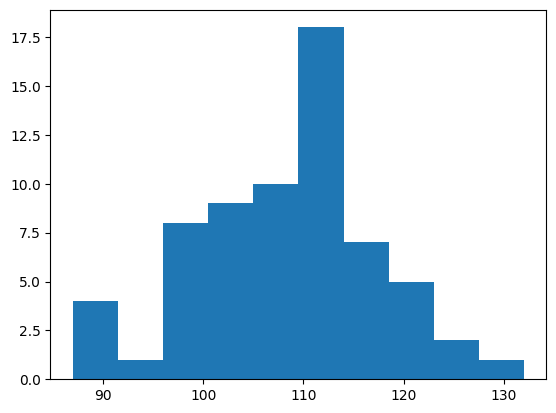

In [154]:
plt.hist(mia_pts)

In [165]:
df = pd.read_csv('nba_elo_latest.csv',low_memory=False)

df

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
0,2022-10-18,2023,0,NaN,BOS,PHI,1657.639749,1582.247327,0.732950,0.267050,...,NaN,1693.243079,1641.876729,0.670612,0.329388,126.0,117.0,96,13,55
1,2022-10-18,2023,0,NaN,GSW,LAL,1660.620307,1442.352444,0.862011,0.137989,...,NaN,1615.718147,1472.173711,0.776502,0.223498,123.0,109.0,67,20,44
2,2022-10-19,2023,0,NaN,DET,ORL,1393.525172,1366.089249,0.675590,0.324410,...,NaN,1308.969909,1349.865183,0.563270,0.436730,113.0,109.0,3,1,2
3,2022-10-19,2023,0,NaN,IND,WAS,1399.201934,1440.077372,0.584275,0.415725,...,NaN,1462.352663,1472.018225,0.599510,0.400490,107.0,114.0,37,28,33
4,2022-10-19,2023,0,NaN,MEM,NYK,1605.024654,1520.387218,0.743236,0.256764,...,NaN,1612.012431,1549.908529,0.691851,0.308149,115.0,112.0,80,25,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2023-04-09,2023,0,NaN,DAL,SAS,1516.583011,1306.357782,0.856412,0.143588,...,NaN,1617.586581,1324.943089,0.915929,0.084071,NaN,NaN,33,5,19
1226,2023-04-09,2023,0,NaN,DEN,SAC,1627.856542,1545.743557,0.740453,0.259547,...,NaN,1665.317715,1525.508403,0.774303,0.225697,NaN,NaN,83,13,48
1227,2023-04-09,2023,0,NaN,PHO,LAC,1551.244800,1509.636561,0.693209,0.306791,...,NaN,1600.955152,1554.950011,0.729848,0.270152,NaN,NaN,79,63,71
1228,2023-04-09,2023,0,NaN,OKC,MEM,1482.264231,1602.483107,0.470936,0.529064,...,NaN,1443.311836,1656.142599,0.318498,0.681502,NaN,NaN,68,6,37
